# PS 4

In [14]:
library(ggplot2)
library(MASS)
library(broom)
library(lattice)
library(TeachingDemos)
library(repr)

In [5]:
movie_budgets = read.table(file.choose(),header = T)

In [6]:
movie_budgets$log_budget = log10(movie_budgets$budget)
head(movie_budgets)

title,year,length,budget,log_budget
'G' Men,1935,85,450000,5.653213
'Manos' the Hands of Fate,1966,74,19000,4.278754
'Til There Was You,1997,113,23000000,7.361728
.com for Murder,2002,96,5000000,6.698970
10 Things I Hate About You,1999,97,16000000,7.204120
100 Mile Rule,2002,98,1100000,6.041393


# Q1

It can be clearly observed from the graph that there is a non linear trend between log(Budget) and year/length. Hence loess or rlm is appropriate to use.

Yes an interaction is needed between year and length.

There isn't a great trend between log(budget) and Year alone but the trend between log(budget) and length when split by year depicts a sharp increase in budget for all the movies above length of 150 units over the years.

After observing various values, a span of 0.35 appears appropriate.

Robust fit is more apt for this data than Ordinary Least Squares since the curve is drastically impacted by a few outlier lengths above 150. Hence these outliers are appropriately tackled by rlm method without major impact to the curve.

# Q2

In [46]:
length.bend = function(x) {
  return((x - 150) * (x < 150))
}
movie_budgets.rlm = rlm(log_budget ~ year + length.bend(length), data = movie_budgets, psi = psi.bisquare)
movie_budgets.grid = expand.grid(year = c(1906, 1985, 2000, 2005), length = c(50,150,250,350))
movie_budgets.grid.predict = predict(movie_budgets.rlm, newdata = movie_budgets.grid)

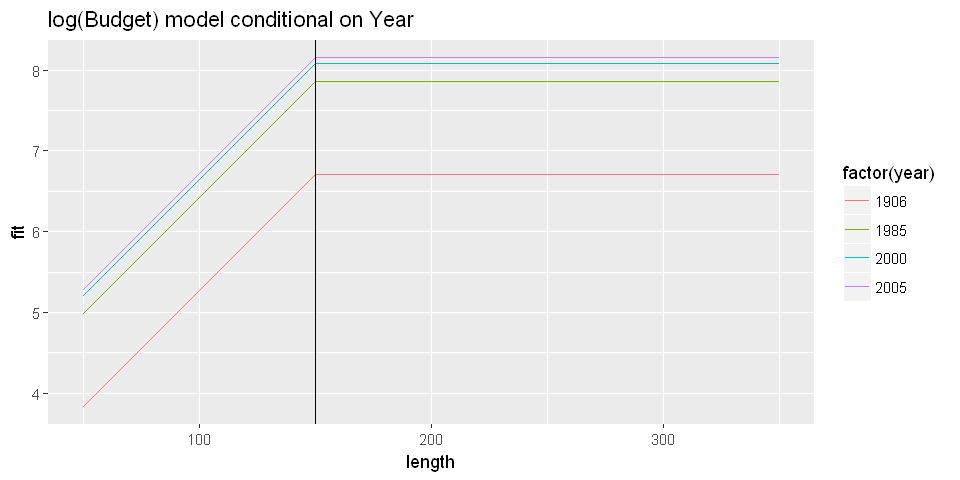

In [42]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(data.frame(movie_budgets.grid, fit = as.vector(movie_budgets.grid.predict)), 
       aes(x = length,y = fit, group = year, color = factor(year)))+ geom_line() + geom_vline(xintercept = 150) +
ggtitle("log(Budget) model conditional on Year")

The log(Budget) increases steeply till the length of the movie is 150 units but beyond 150 it is constant for all the lengths.

# Q3

In [39]:
mb.grid = expand.grid(year = seq(1906,2005,1), length = seq(25,400,5))
movie.budgets.rlm = rlm(log_budget ~ year * length.bend(length), data = movie_budgets,
                         psi = psi.bisquare)
mb_pr = predict(movie.budgets.rlm, newdata = mb.grid)
mb_plot_df = data.frame(mb.grid, fit = as.vector(mb_pr))

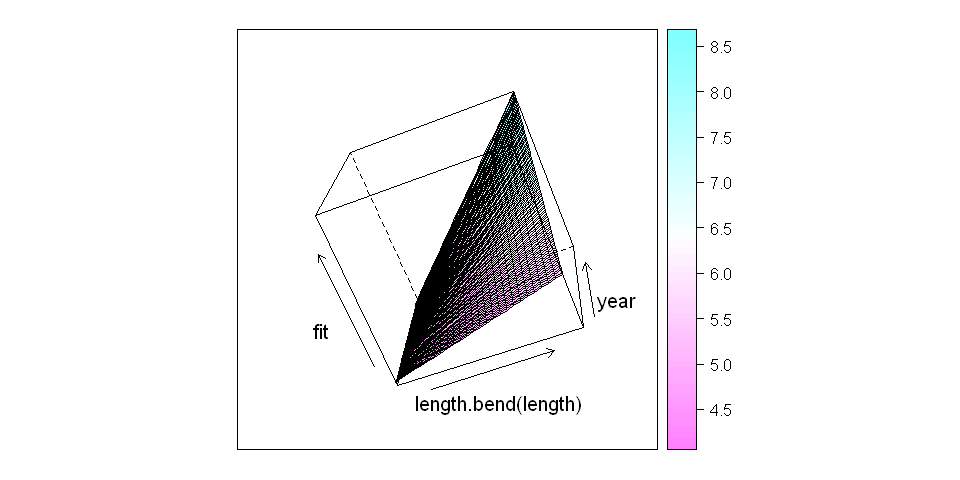

In [45]:
#rotate.wireframe(fit ~ length.bend(length) * year, data = mb_plot_df, screen = list(z = 40, x = -60, y = -48), drape = TRUE)
wireframe(fit ~ length.bend(length) * year, data = mb_plot_df, screen = list(z = 40, x = -60, y = -48), drape = TRUE)

This graph projects that the log(Budget) varies more with year than with length. This variation is not clearly seen in the curve obtained in Q2.